Importing the Necessary packages

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Loading the Data Set

In [73]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/BigMartSales/train.csv')

Checking how many nulls we have in data.

In [74]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can fix item_weight by aggregating data in same stores having same code, same locale, same MRP.

In [75]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train.groupby(['Item_Identifier','Item_Type'
                                                                  ,'Outlet_Identifier','Item_MRP'
                                                                  ])['Item_Weight'].transform('mean'))

df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train.groupby(['Item_Identifier','Item_Type'
                                                                  ,'Item_MRP'
                                                                  ])['Item_Weight'].transform('mean'))

Conducting Univariate EDA

In [76]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

In [77]:
def univariate_numeric_eda(data):
  sns.set(rc={'figure.figsize' :(5,5)})
  sns.distplot(data, kde=False)
  plt.title('Histogram of {}'.format(data.name))
  plt.ylabel('Count')
  plt.show();
  sns.kdeplot(data, shade=True)
  plt.title('kdePlot of {}'.format(data.name))
  plt.show();
  sns.boxplot(data)
  plt.title('BoxPlot of {}'.format(data.name))
  plt.show();
  

In [78]:
def univariate_categorical_eda(data):
  sns.set(rc={'figure.figsize' :(5,5)})
  sns.countplot(x=data.name, data=df_train)
  plt.title('Count of {}'.format(data.name))
  plt.ylabel('Count')
  plt.xticks(rotation = 90)
  plt.show();
  # sns.violinplot(data)
  # plt.title('Violinplot of {}'.format(data.name))
  # plt.show();
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


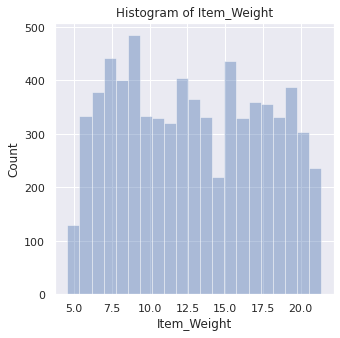

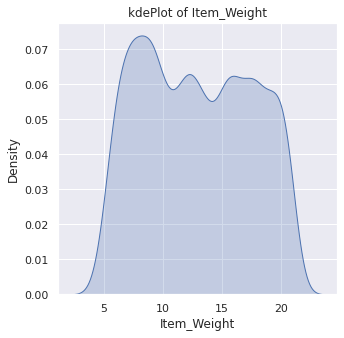

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


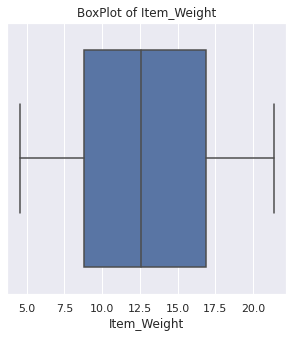

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


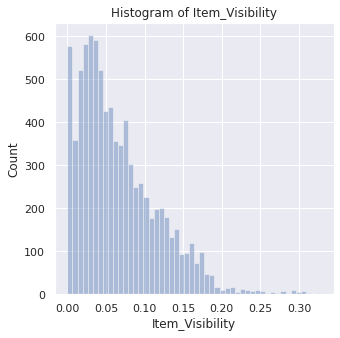

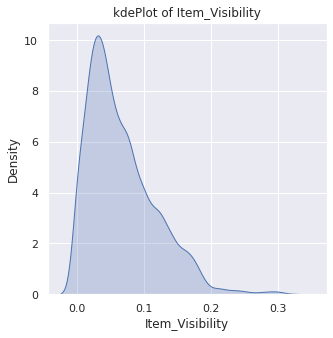

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


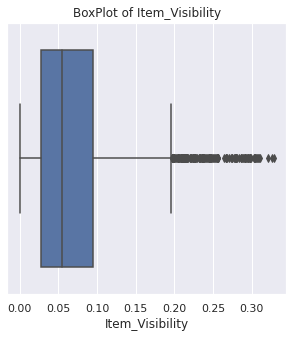

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


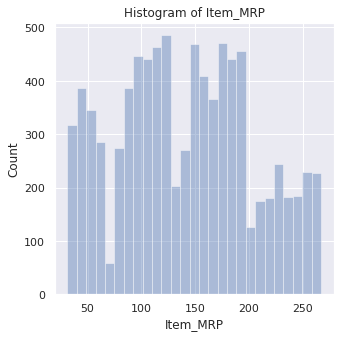

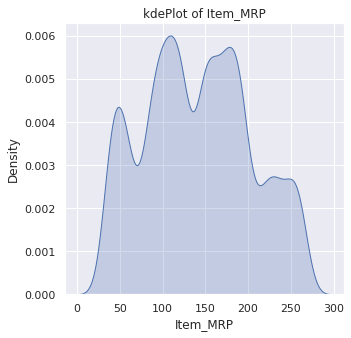

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


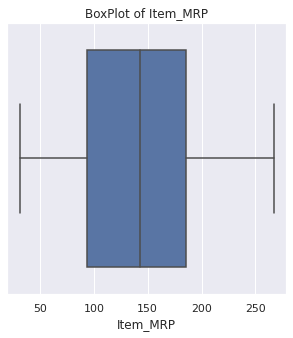

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


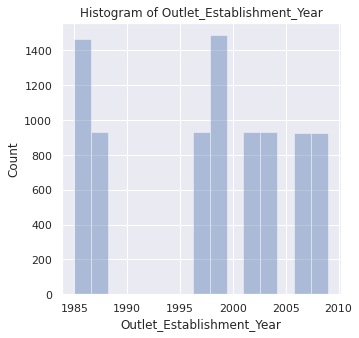

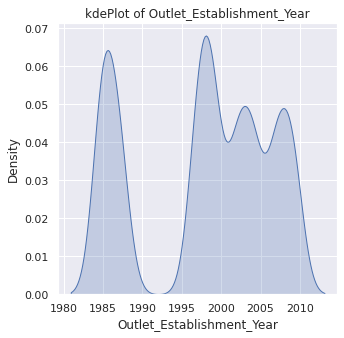

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


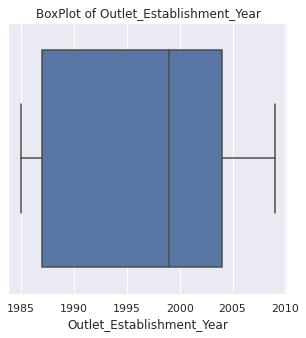

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


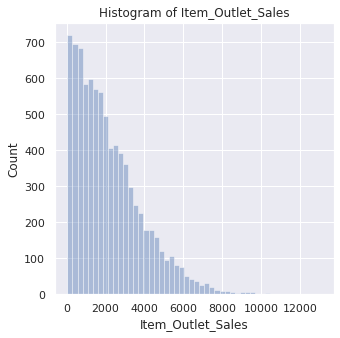

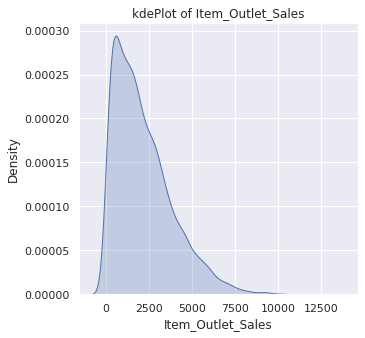

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


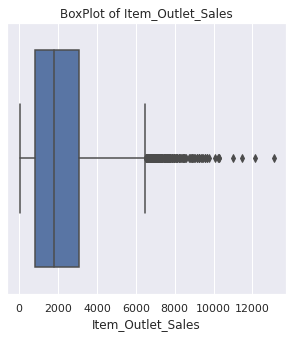

In [79]:
for cols in numeric_data:
  univariate_numeric_eda(df_train[cols])

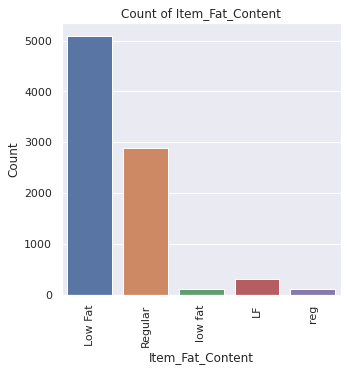

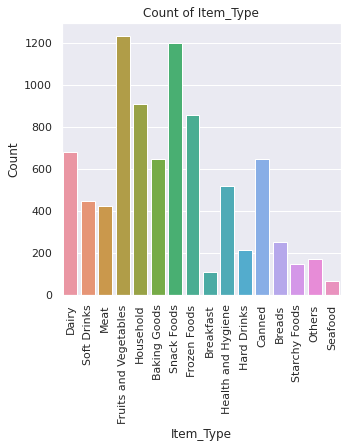

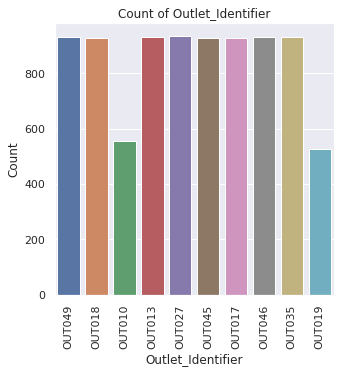

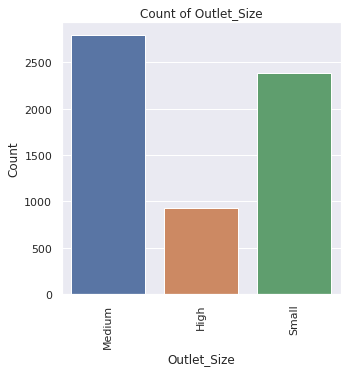

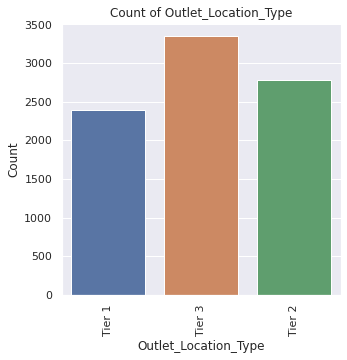

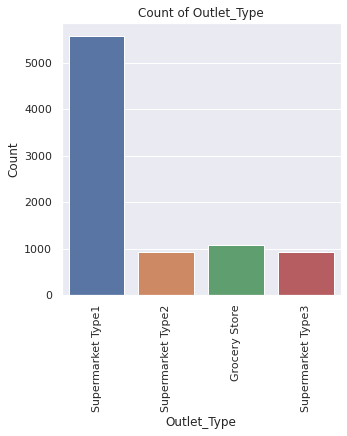

In [80]:
for cat_cols in categorical_data:
  if cat_cols!='Item_Identifier':
    univariate_categorical_eda(df_train[cat_cols])

Based on the categorical distribution plot we can observe a few very obvious things:


*   The item_fat_count has two additional row inputs which can be easily renamed i.e. lf to low fat and reg to regular.
*   The Outlet identifier shows that outlet 10 and outlet 19 have a significantly lower distribution compared to others, we can have a bivariate analysis for them to see if there's some similarity

For Numerical Distribution we observe that data is not exactly a normally distiributed data, so we'll do some data normalisations later.



In [81]:
df_train.Item_Fat_Content.replace(['LF'],'Low Fat',inplace=True)
df_train.Item_Fat_Content.replace(['low fat'],'Low Fat',inplace=True)
df_train.Item_Fat_Content.replace(['reg'],'Regular',inplace=True)

Conducting Bivariate Analysis to see the different distribution wrt a new variable.

In [82]:
def bivariate_numerical_eda(data):
  sns.set(rc={'figure.figsize' :(5,5)})
  sns.pairplot(data=data)
  plt.show();

In [83]:
def bivariate_categorical_eda(data):
  sns.set(rc={'figure.figsize' :(5,5)})
  sns.catplot(x=data.name, y='Item_Outlet_Sales',data=df_train, kind="violin")
  plt.xticks(rotation = 90)
  sns.catplot(x=data.name, y='Item_Outlet_Sales',data=df_train, kind="boxen")
  plt.xticks(rotation = 90)
  plt.show();

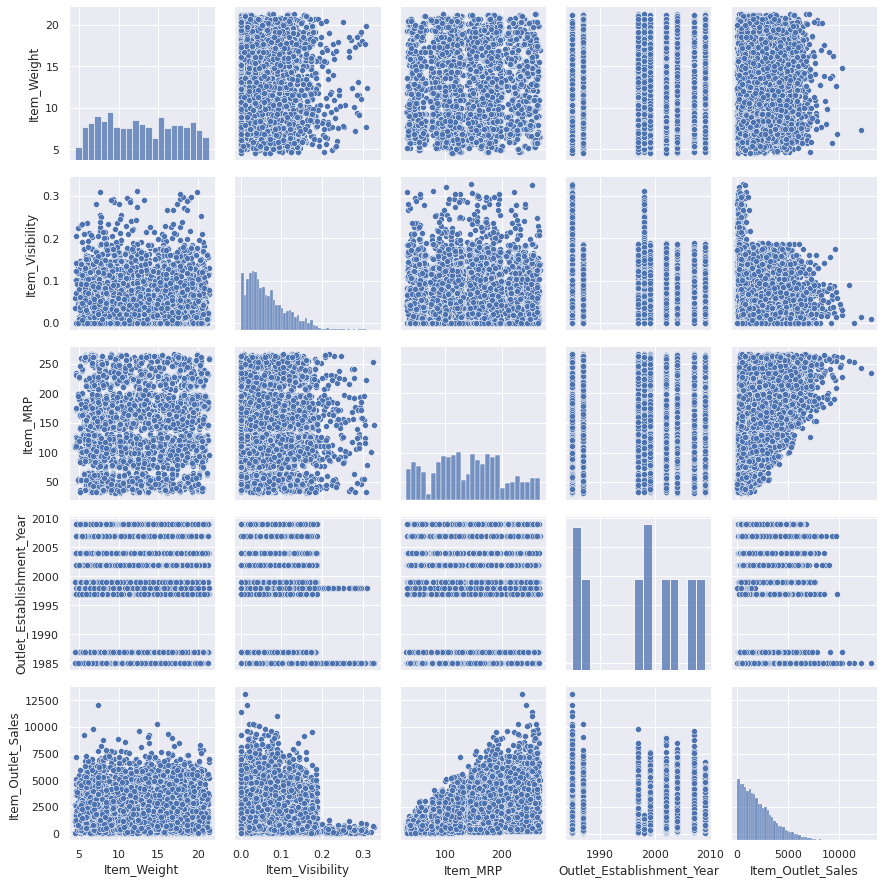

In [84]:
bivariate_numerical_eda(numeric_data)

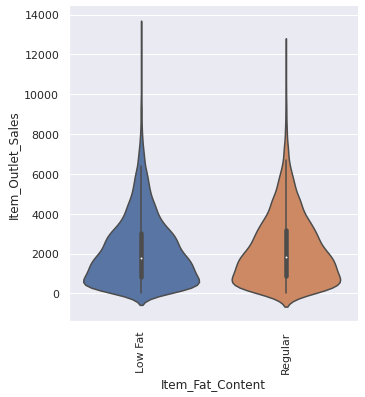

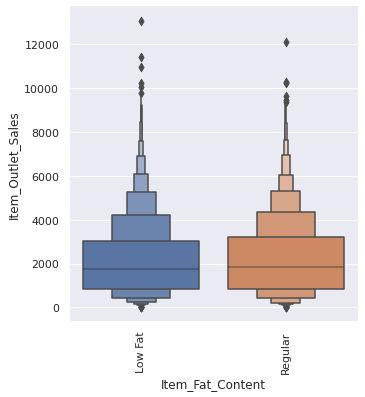

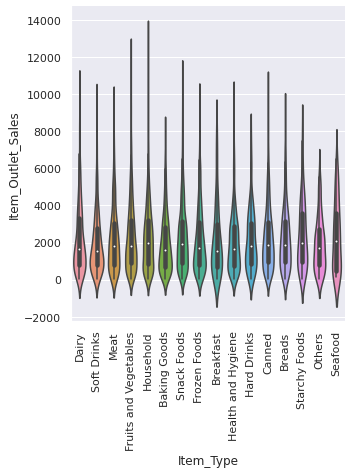

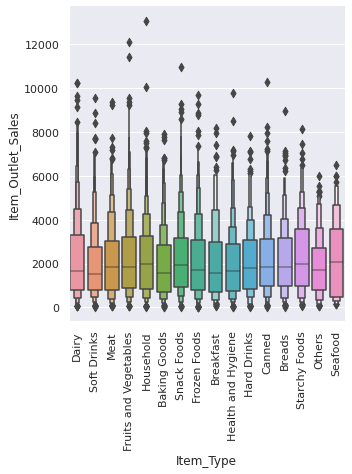

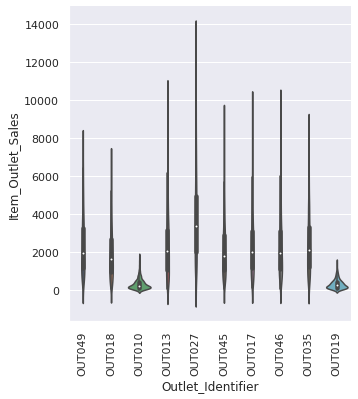

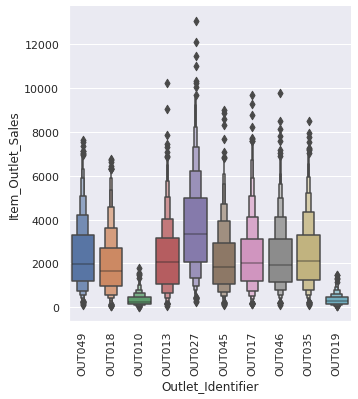

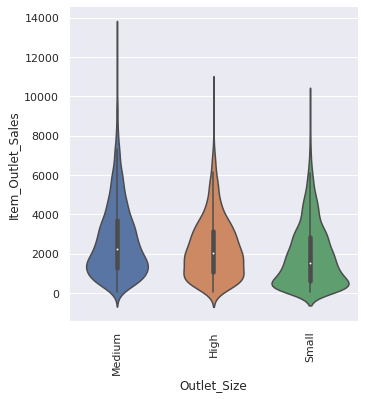

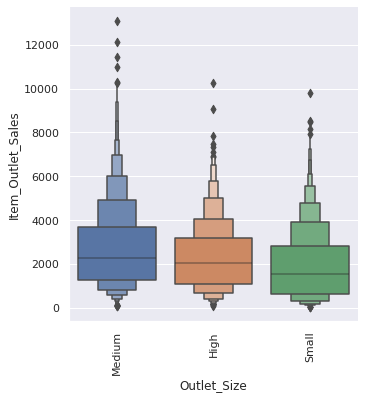

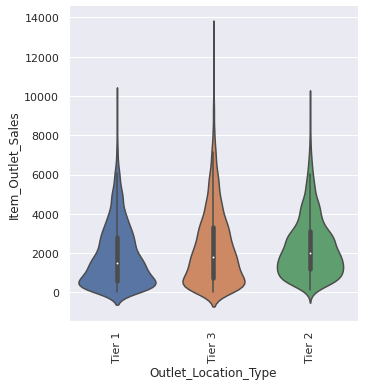

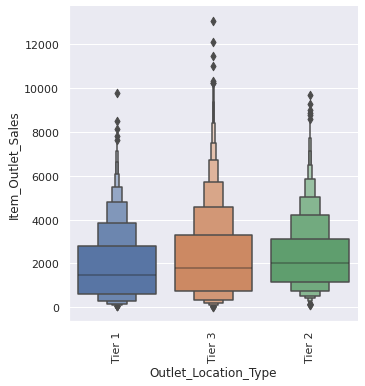

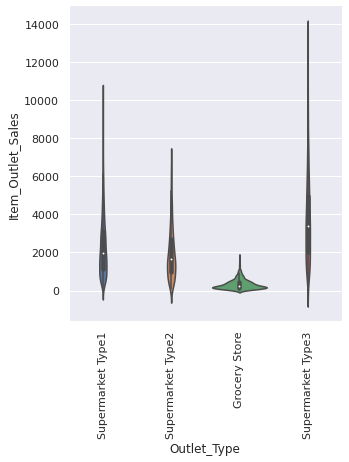

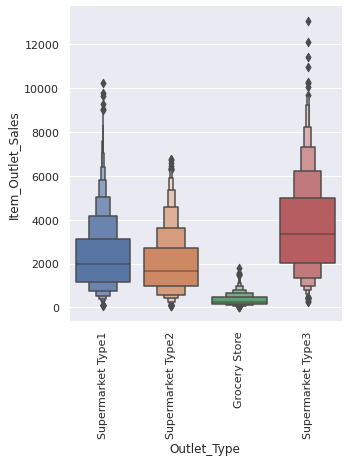

In [85]:
for cat_col in categorical_data:
  if cat_col!='Item_Identifier':
    bivariate_categorical_eda(categorical_data[cat_col])

Correlation for Numeric Variables

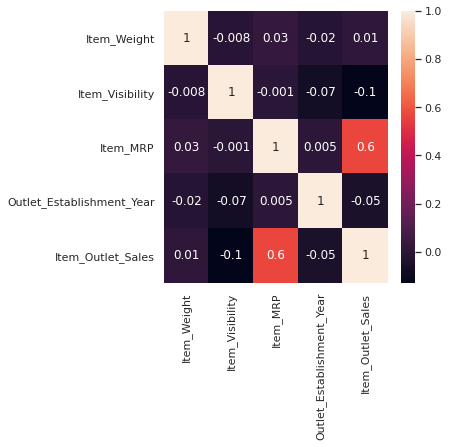

In [86]:
sns.heatmap(df_train.corr(), annot=True, fmt='.1g')

Checking the correlation for categorical variables.

In [87]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [88]:
for cat_col in categorical_data:
  if cat_col!='Item_Identifier':
    print('Correlation for '+cat_col+' is {}'.format(cramers_v(df_train[cat_col],df_train.Item_Outlet_Sales)))

Correlation for Item_Fat_Content is 0.1876200795751987
Correlation for Item_Type is 0.1691938076182213
Correlation for Outlet_Identifier is 0.1898728236696901
Correlation for Outlet_Size is 0.06620601983850594
Correlation for Outlet_Location_Type is 0.11204252313477162
Correlation for Outlet_Type is 0.3833358421577236


For all the others we'll one hot encode the variables, this is done to avoid any bias in case the model reads them as weights and not labels.

In [90]:
df_train=pd.get_dummies(df_train, columns=["Outlet_Type"])
df_train=pd.get_dummies(df_train, columns=["Outlet_Location_Type"])
df_train=pd.get_dummies(df_train, columns=["Outlet_Identifier"])
df_train=pd.get_dummies(df_train, columns=["Item_Type"])
df_train=pd.get_dummies(df_train, columns=["Item_Fat_Content"])

Outlet Size can be catered in two parts, we either drop the whole column and be done with it or we estimate the size based on location type, establishment year, outlet type.

In [95]:
df_train.drop(columns='Outlet_Size', inplace=True)
df_train.drop(columns='Item_Weight', inplace=True)
df_train.drop(columns='Item_Identifier', inplace=True)

Now we have to scale the variables to help the model perform better.